# Part 1: Data Preparation and Preprocessing. 

Student 1's name: Jing-Hwa Tu,
Student 1's number: s5327886,
Student 1's email: jing-hwa.tu@griffithuni.edu.au

Student 2's name: Ha Dinh Thi Ngoc,
Student 2's number: s5332240,
Student 2's email: ha.dinhthingoc@griffithuni.edu.au

## 1: Load the dataset

In [149]:
# Set up 
import numpy as np 
import pandas as pd 

In [150]:
# Open our dataset
assignment = pd.read_csv('data.csv')
assignment

/var/folders/ll/s3gcwbbn2210b53hfksb0dk80000gn/T/ipykernel_1865/3399444617.py:2: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  assignment = pd.read_csv('data.csv')


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13T00:00:00.000Z,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12T00:00:00.000Z,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08T00:00:00.000Z,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN


## 2. Describe the dataset

In [151]:
assignment.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


In [152]:
assignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [153]:
assignment['Date'] = assignment['Date'].replace(to_replace='T00:00:00.000Z',value='',regex=False)
assignment['Date'] = pd.to_datetime(assignment['Date'])
assignment['Date'] = assignment['Date'].dt.tz_localize(None)
assignment.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

#### Period of the dataset

In [154]:
print (assignment['Date'].min(), assignment['Date'].max())

2018-10-01 00:00:00 2019-03-13 00:00:00


In [155]:
assignment.nunique()

Id                   318477
Title                168065
Company               40628
Date                    163
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          234287
FullDescription      250901
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

#### Location that has the most job postings

In [156]:
location_most_jobs = assignment['Location'].value_counts()
common_location = location_most_jobs.idxmax()
print('Location that has most job postings:', common_location)

Location that has most job postings: Sydney


#### Classification

In [157]:
classification_jp = assignment['Classification'].value_counts()
classification_jp

Classification
Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property   

#### Subclassification of ICT

In [158]:
favorite_classification = assignment[assignment['Classification']=='Information & Communication Technology']
subclassification_count = favorite_classification.groupby('SubClassification').size()
for subclassification, count in subclassification_count.items():
    print(f"Subclassification names: {subclassification}, Job postings: {count}")

Subclassification names: Architects, Job postings: 1548
Subclassification names: Business/Systems Analysts, Job postings: 2986
Subclassification names: Computer Operators, Job postings: 13
Subclassification names: Consultants, Job postings: 1149
Subclassification names: Database Development & Administration, Job postings: 551
Subclassification names: Developers/Programmers, Job postings: 4211
Subclassification names: Engineering - Hardware, Job postings: 116
Subclassification names: Engineering - Network, Job postings: 552
Subclassification names: Engineering - Software, Job postings: 1437
Subclassification names: Help Desk & IT Support, Job postings: 1374
Subclassification names: Management, Job postings: 746
Subclassification names: Networks & Systems Administration, Job postings: 1194
Subclassification names: Other, Job postings: 997
Subclassification names: Product Management & Development, Job postings: 376
Subclassification names: Programme & Project Management, Job postings: 241

In [159]:
assignment['LowestSalary'].value_counts()

LowestSalary
0      62639
40     34436
70     28712
60     28499
100    27673
50     27027
150    25841
120    24514
80     24249
30     23476
200    11411
Name: count, dtype: int64

In [160]:
assignment['HighestSalary'].value_counts()

HighestSalary
30     62639
50     34436
80     28712
70     28499
120    27673
60     27027
200    25841
150    24514
100    24249
40     23476
999    11411
Name: count, dtype: int64

#### Salary ranges and total job postings

In [161]:
low = assignment['LowestSalary'].dropna().unique()
high = assignment['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

assignment_salary_ranges = pd.DataFrame({"Low": low, "High":high})
assignment_salary_ranges['Count'] = assignment_salary_ranges['Low'].apply(lambda x: len(assignment[assignment['LowestSalary']==x]))
assignment_salary_ranges['Salary Ranges'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200-999'])
assignment_salary_ranges

,Low,High,Count,Salary Ranges
0,0,30,62639,0-30
1,30,40,23476,30-40
2,40,50,34436,40-50
3,50,60,27027,50-60
4,60,70,28499,60-70
5,70,80,28712,70-80
6,80,100,24249,80-100
7,100,120,27673,100-120
8,120,150,24514,120-150
9,150,200,25841,150-200


#### Job types, the lowest and highest salaries

In [162]:
assignment.groupby('JobType').agg({'LowestSalary': 'min', 'HighestSalary': 'max'})

,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


In [163]:
job_types = assignment['JobType'].unique()
print(job_types)

[nan 'Full Time' 'Contract/Temp' 'Part Time' 'Casual/Vacation']


In [164]:
jobtypes = assignment['JobType'].dropna().unique()
df_jobtype = pd.DataFrame({"JobType": jobtypes})
df_jobtype['Count'] = df_jobtype['JobType'].apply(lambda x: pd.Series(len(assignment[assignment['JobType']==x])))
df_jobtype

,JobType,Count
0,Full Time,201225
1,Contract/Temp,53906
2,Part Time,21893
3,Casual/Vacation,25355


#### Average Salary

In [165]:
assignment = assignment.assign(AverageSalary = (assignment['LowestSalary'] + assignment['HighestSalary'])/2)
assignment.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0


#### Change the id value

In [166]:
assignment['Id'] = assignment['Id'].astype(str)  
assignment['Id'] = assignment['Id'].str.replace(r'\D', '')  
assignment['Id'] = assignment['Id'].str.zfill(8) 
assignment['Id'] = pd.to_numeric(assignment['Id'], errors='coerce')
assignment.to_csv('updated_dataset.csv', index=False)
assignment.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


#### Change the date value

In [167]:
assignment["Date"] = assignment["Date"].replace(to_replace='T00:00:00.000Z',value='',regex=False)
assignment["Date"] = pd.to_datetime(assignment["Date"])
assignment["Date"] = assignment["Date"].dt.tz_localize(None)
assignment.dtypes

Id                          float64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

#### Duplicates check

In [168]:
assignment[assignment.duplicated()].shape[0]
assignment.drop_duplicates(inplace=False)
assignment.isnull().sum()

Id                    43462
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
AverageSalary             0
dtype: int64

#### Visualization

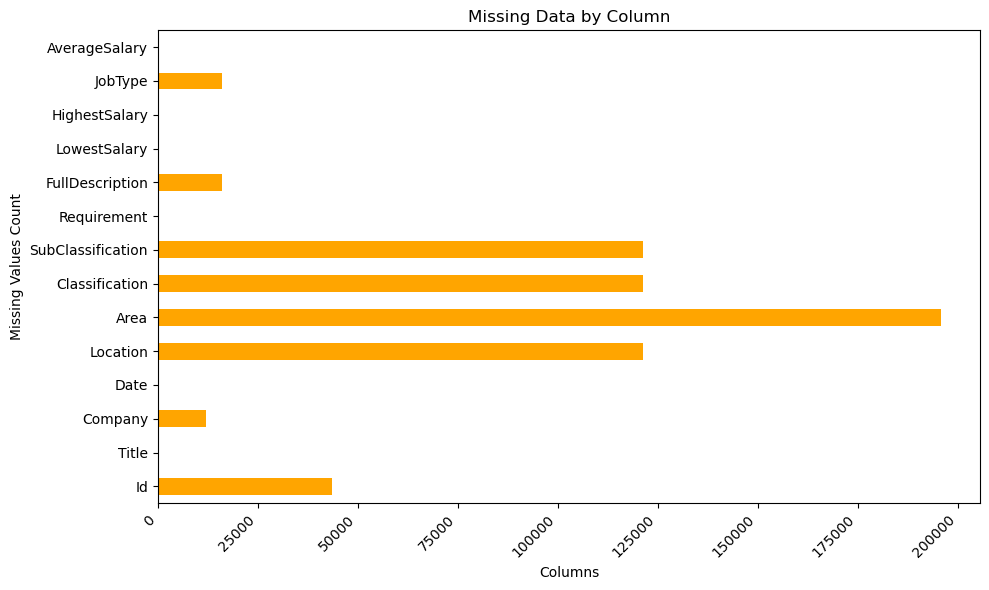

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_data = assignment.isnull().sum()
plt.figure(figsize=(10, 6))
missing_data.plot(kind='barh', color='orange')
plt.title('Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

- From the dataset, we can see that it has 318477 rows and 13 columns. 

- The value range of the dataset includes:
   + count: This indicates the number of non-null values in each column. In this case, both columns have 318,477      non-null values, suggesting there are no missing values in these columns.
   + mean: This represents the average value of each column. For "LowestSalary", the mean is approximately 65.81,      and for "HighestSalary", it's approximately 114.43.
   + std: This is the standard deviation, which measures the dispersion or spread of values around the mean. A        higher standard deviation indicates greater variability in the data. Here, "HighestSalary" has a higher standard    deviation than "LowestSalary", indicating more variability in the values.
   + min: This is the minimum value observed in each column. The minimum "LowestSalary" is 0, while the minimum        "HighestSalary" is 30.
   + 25%, 50%, 75%: These are the quartiles of the data. The 25th, 50th (median), and 75th percentiles are shown.      For example, 25% of the values in "LowestSalary" are less than or equal to 30, and 75% are less than or equal to    100.
   + max: This is the maximum value observed in each column. The maximum "LowestSalary" is 200, and the maximum        "HighestSalary" is 999
   
- The data types of each column are:
   + Id, Title, Company, Date, Location, Area, Classification, Subclassification, Requirement, FullDescription, JobType are object type. 
   + LowestSalary, HighestSalary columns are int64 type. 

- The period of the dataset starts at 00:00:00 Octorber 1st, 2018 to 13th March, 2019 00:00:00. There are 163 dates that have job posting. 

- There are 65 locations in our dataset. The location that has the most job postings is Sydney. 

- There are 30 classifications, and these are the count values of each sector:
   + Information & Communication Technology 22796
   + Trades & Services 17976
   + Healthcare & Medical 17085
   + Hospitality & Tourism 15523
   + Manufacturing, Transport & Logistics 12376
   + Administration & Office Support 10020
   + Accounting 9368
   + Education & Training 9280
   + Construction 8372
   + Sales 8119
   + Retail & Consumer Products 8041
   + Government & Defence 7443
   + Engineering 6458
   + Mining, Resources & Energy 6288
   + Banking & Financial Services 4633
   + Community Services & Development 4485
   + Legal 4237
   + Human Resources & Recruitment 4144
   + Call Centre & Customer Service 3971
   + Marketing & Communications 3968
   + Real Estate & Property 3614
   + Design & Architecture 1811
   + Insurance & Superannuation 1474
   + Consulting & Strategy 1206
   + Sport & Recreation 984
   + Science & Technology 905
   + Farming, Animals & Conservation 882
   + CEO & General Management 844
   + Advertising, Arts & Media 833
   + Self Employment 93
   
- There 22 sub-sectors related to Information & Communication Technology, with:
   + Subclassification names: Architects, Job postings: 1548
   + Subclassification names: Business/Systems Analysts, Job postings: 2986
   + Subclassification names: Computer Operators, Job postings: 13
   + Subclassification names: Consultants, Job postings: 1149
   + Subclassification names: Database Development & Administration, Job postings: 551
   + Subclassification names: Developers/Programmers, Job postings: 4211
   + Subclassification names: Engineering - Hardware, Job postings: 116
   + Subclassification names: Engineering - Network, Job postings: 552
   + Subclassification names: Engineering - Software, Job postings: 1437
   + Subclassification names: Help Desk & IT Support, Job postings: 1374
   + Subclassification names: Management, Job postings: 746
   + Subclassification names: Networks & Systems Administration, Job postings: 1194
   + Subclassification names: Other, Job postings: 997
   + Subclassification names: Product Management & Development, Job postings: 376
   + Subclassification names: Programme & Project Management, Job postings: 2413
   + Subclassification names: Sales - Pre & Post, Job postings: 449
   + Subclassification names: Security, Job postings: 774
   + Subclassification names: Team Leaders, Job postings: 173
   + Subclassification names: Technical Writing, Job postings: 97
   + Subclassification names: Telecommunications, Job postings: 357
   + Subclassification names: Testing & Quality Assurance, Job postings: 831
   + Subclassification names: Web Development & Production, Job postings: 452
   
- Salary ranges and total job postings based on each salary range:

| Salary ranges | Count        | 
|-------------- |----------    |
|0 - 30       | 62639 |
|30 - 40       | 23476 |
|40 - 50       | 34436 |
|50 - 60       | 27027 |
|60 - 70       | 28499 |
|70 - 80       | 28712 |
|80 - 100       | 24249 |
|100 - 120       | 27673 |
|120 - 150       | 24514 |
|150 - 200       | 25841 |
|200 - 999      | 11411 |

- There are 4 job types, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'. The lowest and highest salary in each job type include:

|JobType	|  LowestSalary  |	HighestSalary  |
|-----------|----------------|-----------------|
| Casual/Vacation |	0	     |  999            |
| Contract/Temp   |	0	     |  999            |
| Full Time       |	0	     |  999             |
|Part Time| 	0	| 999  |

# Part 2: Data Understanding 

#### Total job of each range and average salary range

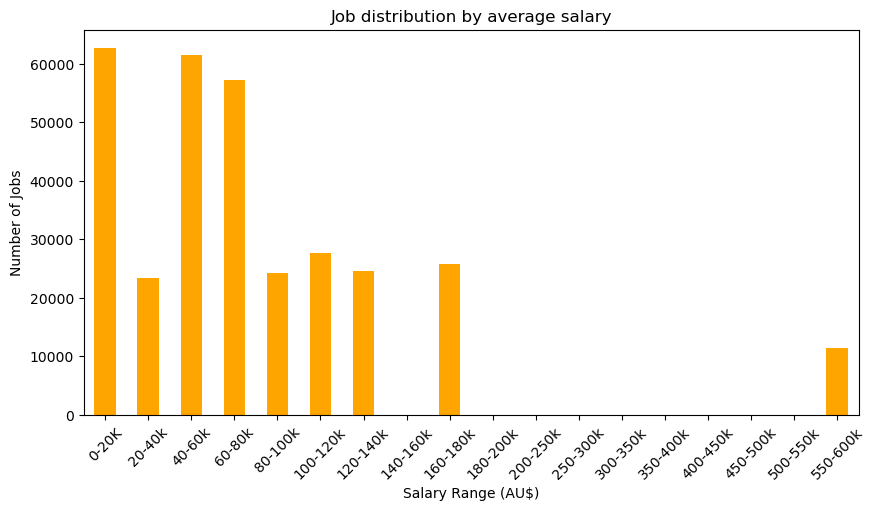

In [170]:
assignment['AverageSalary'].max() #599.5
assignment['AverageSalary'].min() #15.0

# Define salary ranges
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]

# Create labels for these bins
labels = ['0-20K', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k', '160-180k', '180-200k', 
          '200-250k', '250-300k', '300-350k', '350-400k', '400-450k', '450-500k', '500-550k', '550-600k']

# Categorize the average salaries into the bins
assignment['SalaryRange'] = pd.cut(assignment['AverageSalary'], bins=bins, labels=labels, right=False)

# Calculate the number of jobs in each range
salary_distribution = assignment['SalaryRange'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
salary_distribution.plot(kind='bar', color='orange')
plt.title('Job distribution by average salary')
plt.xlabel('Salary Range (AU$)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

## Observation
The 3 highest numbers of jobs fall within the 0-20K, 40-60K, and 60-80K salary ranges, each with around 60,000 jobs. This indicates that a significant portion of the job market offers lower to mid-range salaries. The other ranges generally have around 25,000 jobs, showing a relatively balanced distribution for mid-level income positions.

Interestingly, there are no jobs listed in the 180-550K salary range. This absence suggests a gap in the job market for high-income positions within this range. However, the 550-600K range has about 15,000 jobs, indicating the presence of some very high-paying roles. This outlier suggests that while high salaries are less common, there are still opportunities for extremely well-paid positions.

In summary, the job market is predominantly filled with lower to mid-range salary positions, with significant gaps in the higher salary ranges.

#### Display the list of job types and the number of jobs of each type using pie chart.

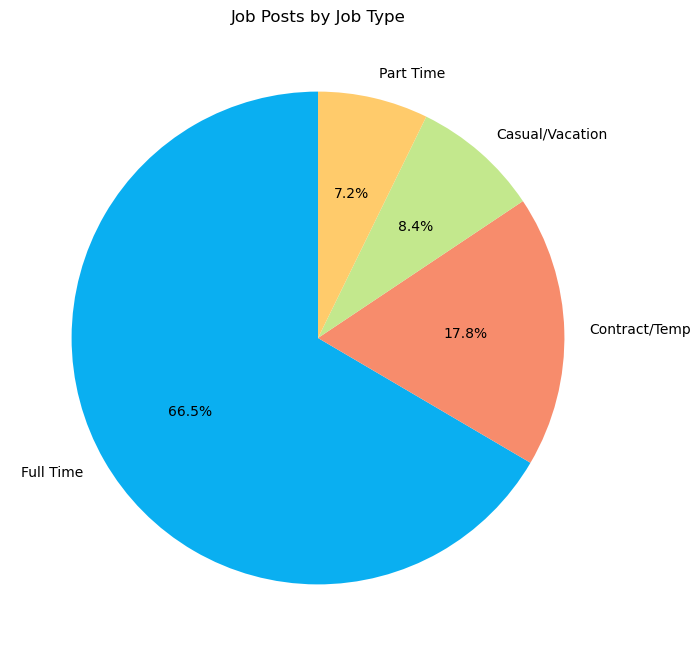

In [171]:
job_type_counts = assignment['JobType'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#0aaff1', '#f78c6c', '#c3e88d', '#ffcb6b'])
plt.title('Job Posts by Job Type') 
plt.show()

## Observation:
The Pie chart shows that the majority of jobs are Full Time, accounting for 66.5%. The second highest category is Contract/Temp, making up 17.8%. Casual/Vacation and Part Time jobs have similar proportions, at 8.4% and 7.2% respectively.

Overall, the job market is heavily skewed towards full-time positions, with a notable presence of contract/temp roles. Casual and part-time jobs also hold a meaningful share, providing options for flexible work arrangements.

#### Display the list of job sectors and the number of jobs of each type using horizontal bar chart.

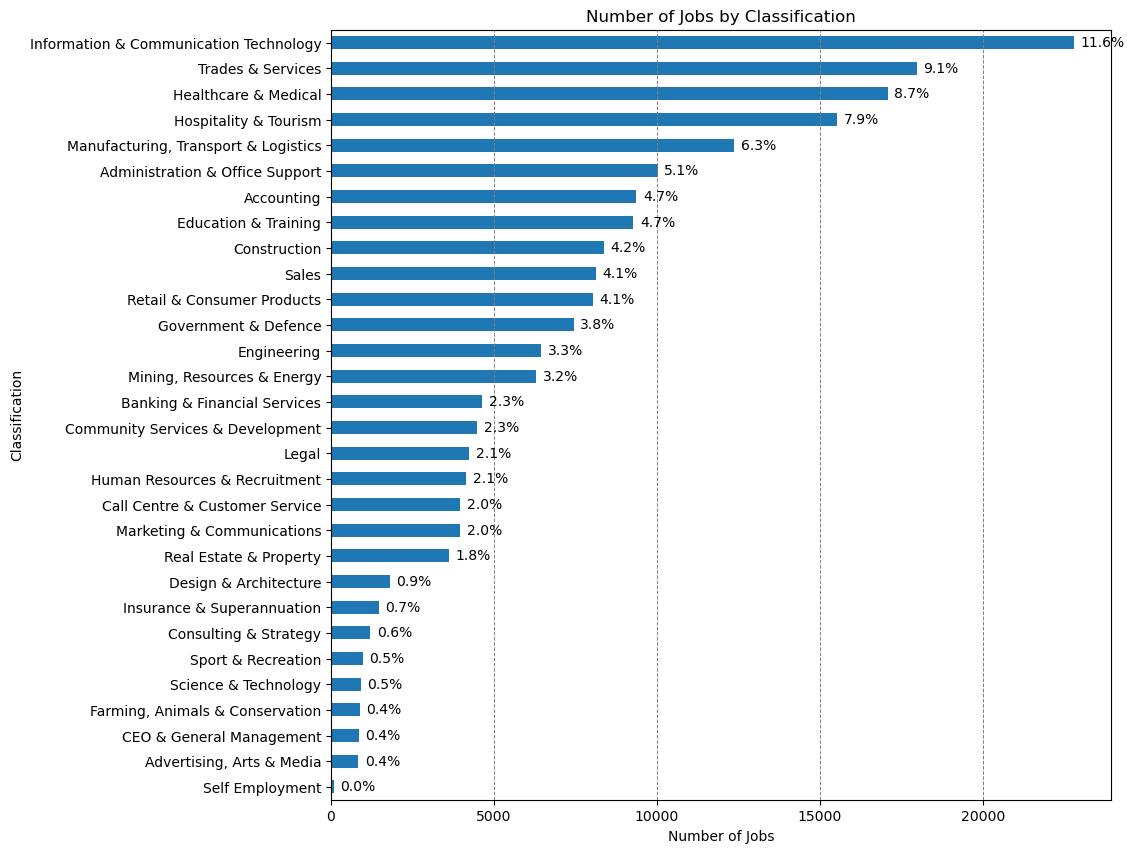

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of jobs for each classification and sort the values
d = assignment['Classification'].value_counts().sort_values()

# Calculate the total number of jobs
total_jobs = d.sum()

# Create the horizontal bar chart
plt.figure(figsize=(12, 10))  # Adjust the figure size as necessary
ax = d.plot(kind='barh')
plt.title('Number of Jobs by Classification')  # Set the title of the chart
plt.xlabel('Number of Jobs')  # Set the x-axis label
plt.ylabel('Classification')  # Set the y-axis label

# Add vertical lines at 5000, 10000, 15000, and 20000
for value in [5000, 10000, 15000, 20000]:
    ax.axvline(x=value, color='grey', linestyle='--', linewidth=0.7)

# Adjust the plot margins to provide space for the percentage labels
plt.subplots_adjust(left=0.2, right=0.85)

# Add percentage labels to each bar
for i in ax.patches:
    # Get the width of the bar (i.e., the number of jobs)
    width = i.get_width()
    # Calculate the percentage
    percentage = width / total_jobs * 100
    # Set the position of the label
    ax.text(width + 200, i.get_y() + i.get_height() / 2, f'{percentage:.1f}%', va='center')

plt.show()

## Observation:
The chart illustrates the distribution of jobs by classification. Information & Communication Technology (ICT) has the highest number of jobs, accounting for 11.6% of the total, with approximately 24,000 job postings indicating a strong demand in this sector. This is followed by Trades & Services at 9.1%, Healthcare & Medical at 8.7%, and Hospitality & Tourism at 7.9%, each with around 16,000 to 17,000 job postings. Manufacturing, Transport & Logistics account for 6.3% of the total job postings.

Other notable sectors include Administration & Office Support, Accounting, and Education & Training, each with about 5% of the job postings. Several sectors, including Construction, Sales, Retail & Consumer Products, Government & Defence, Engineering, and Mining, Resources & Energy, account for 3% to 4% of the postings. The remaining sectors each contribute less than 5% to the total job market, with some having minimal representation.

#### Choose your favorite location. Visualize the market share of that location in pie chart.

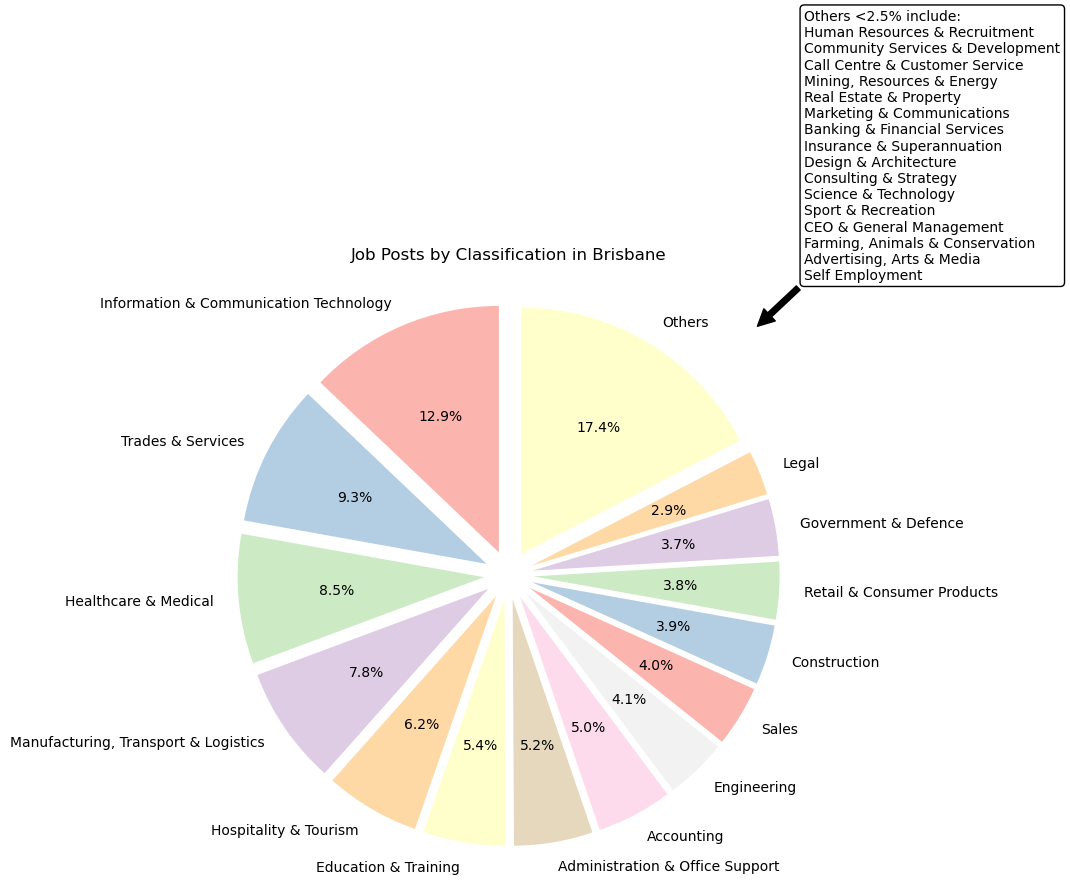

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of jobs in Brisbane for each classification
brisbane_classifications = assignment[assignment['Location'] == 'Brisbane']['Classification'].value_counts()

# Combine classifications < 3% to "Others"
threshold = 0.025 * brisbane_classifications.sum()
others = brisbane_classifications[brisbane_classifications < threshold].sum()
other_labels = brisbane_classifications[brisbane_classifications < threshold].index.tolist()  # Get the labels for "Others"
brisbane_classifications = brisbane_classifications[brisbane_classifications >= threshold]
brisbane_classifications['Others'] = others

# Create explode parameters for the pie chart to slightly separate each slice
explode = [0.1 if count > threshold else 0 for count in brisbane_classifications]

# Plot pie chart with a lighter color palette
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Pastel1", len(brisbane_classifications))  # Using a lighter color palette
plt.pie(brisbane_classifications, labels=brisbane_classifications.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Job Posts by Classification in Brisbane')

# Add annotation for "Others" to show what it includes
other_labels_wrapped = "\n".join(other_labels)
plt.annotate(f'Others <2.5% include:\n{other_labels_wrapped}',
             xy=(1, 1), xytext=(1.2, 1.2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.show()


## Observation:
The pie chart illustrates the distribution of job posts by classification in Brisbane. Information & Communication Technology (ICT) is the largest category, accounting for 12.9% of the job postings, indicating a high demand in this sector.

Next, Trades & Services account for 9.3%, and Healthcare & Medical make up 8.5%. Manufacturing, Transport & Logistics represent 7.8% of the job market. Hospitality & Tourism (6.2%), Education & Training (5.4%), Administration & Office Support (5.2%), and Accounting (5.0%) follow.

Then, the remaining sectors, such as Engineering, Construction, Sales, Retail & Consumer Products, Government & Defence, and Legal, each account for less than 5% of the job posti

ngs. Finally, the "Others" category, which includes classifications that each contribute less than 2.5%, collectively accounts for 17.4% of the job postings.

#### Salary distribution for the top 30 cities for the number of job postings. Visualize them in the boxplot chart

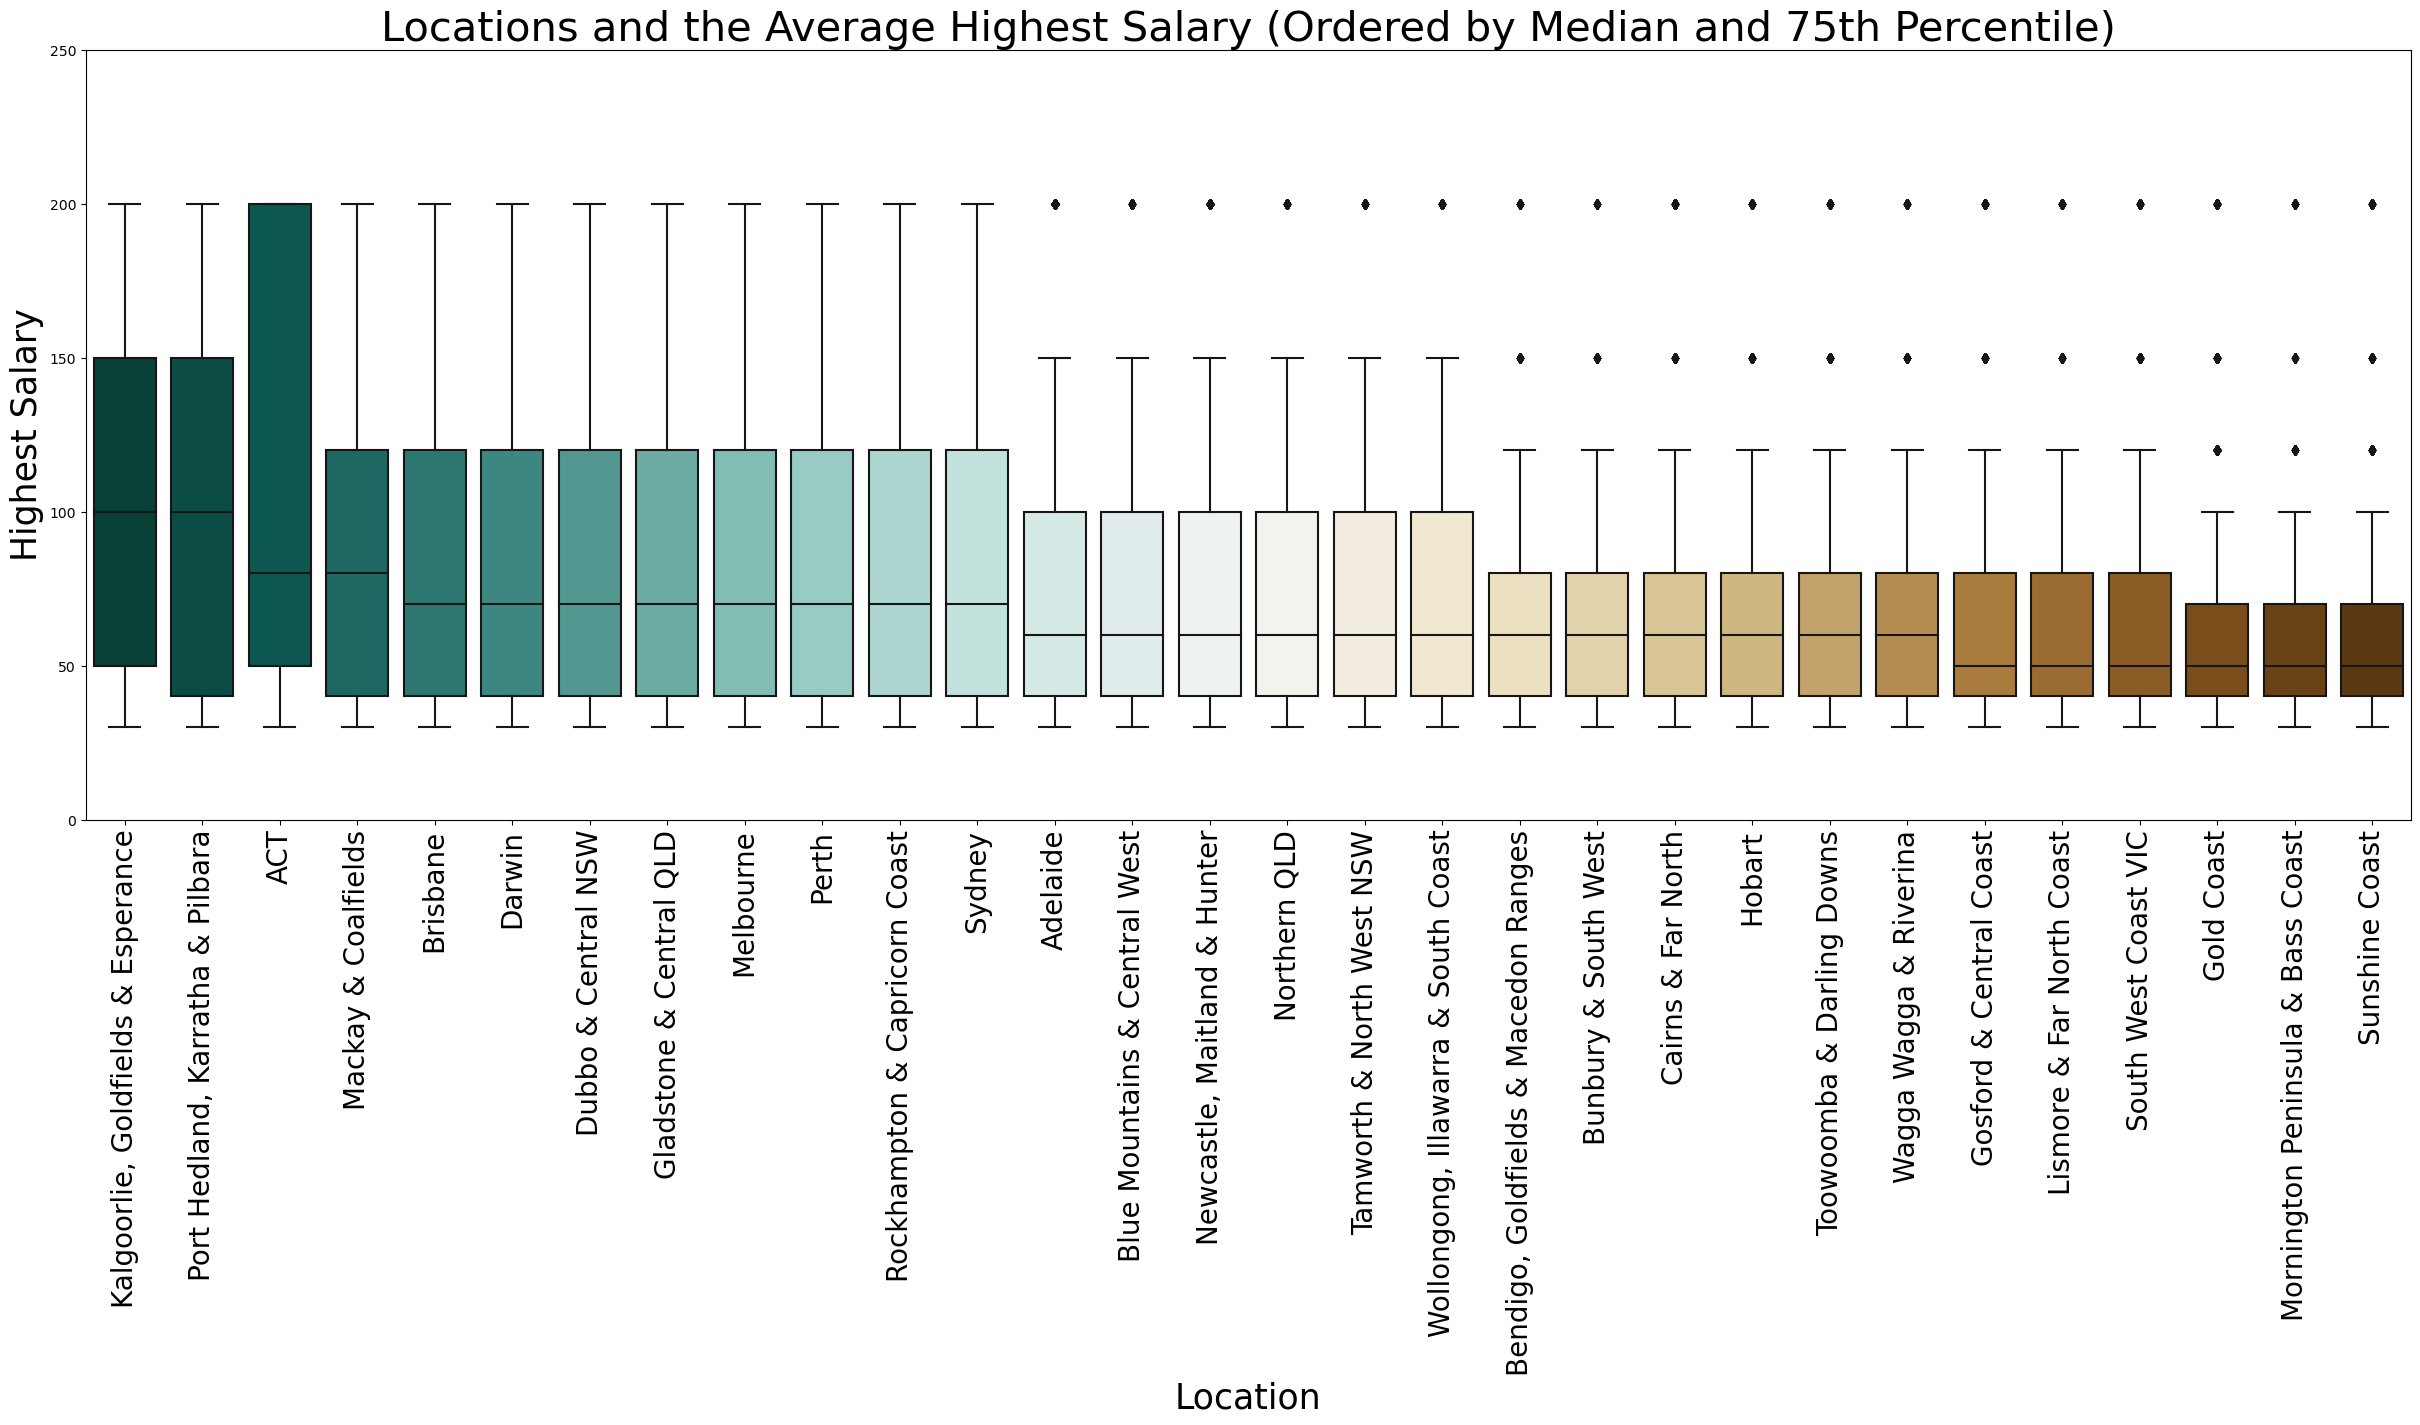

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows with NaN in the 'Location' column
df_location = assignment[assignment['Location'].isna() == False]

# Get the top 30 cities based on the number of job postings
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'], ascending=False)[:30]['Location'].tolist()

# Filter the dataframe to include only the top 30 cities
df_salary_locations_high = assignment[assignment['Location'].isin(df_top_30)]

# Calculate the median and 75th percentile salary for each location
median_salaries = df_salary_locations_high.groupby('Location')['HighestSalary'].median()
percentile_75_salaries = df_salary_locations_high.groupby('Location')['HighestSalary'].quantile(0.75)

# Create a DataFrame with both median and 75th percentile salaries
salary_stats = pd.DataFrame({
    'Median': median_salaries,
    '75th Percentile': percentile_75_salaries
})

# Sort the locations by Median salary, then by 75th percentile salary if Median is the same
sorted_locations = salary_stats.sort_values(by=['Median', '75th Percentile'], ascending=False).index.tolist()

# Plot the boxplot ordered by the combined sorting
plt.figure(figsize=(30, 10))
box_plt_high = sns.boxplot(x='Location', y='HighestSalary', data=df_salary_locations_high, order=sorted_locations, palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(), rotation=90, fontsize=20)
plt.title('Locations and the Average Highest Salary (Ordered by Median and 75th Percentile)', size=30)
plt.ylabel('Highest Salary', fontsize=25)
plt.xlabel('Location', fontsize=25)
plt.ylim([0, 250])
plt.show()

## Observation:
The boxplot visualizes the distribution of the highest salaries across the top 30 cities by job postings, ordered first by the median (50th percentile) salary and then by the 75th percentile salary if the medians are equal. This dual sorting method allows us to see not only the central tendency of the salary distributions but also the spread and upper quartile, providing a comprehensive view of salary distributions across these cities.

From the plot, we can observe three main categories of average highest salaries:

- High Salary Locations:

Kalgoorlie, Goldfields & Esperance, Port Hedland, Karratha & Pilbara, and ACT are at the top with the highest median and 75th percentile salaries. Mackay & Coalfields, Brisbane, and Darwin also fall into this category with relatively high median and 75th percentile salaries.

- Mid Salary Locations:

Cities like Dubbo & Central NSW, Melbourne, Perth, and Sydney have moderate median and 75th percentile salaries. Other locations such as Rockhampton & Capricorn Coast and Adelaide also fit into this middle salary range. Lower Salary Locations:

- LowestSalary Locations: 

The regions with the lowest median and 75th percentile salaries include Mornington Peninsula & Bass Coast, Sunshine Coast, and South West Coast VIC.

Other cities in this category are Gold Coast, Lismore & Far North Coast, and Gosford & Central Coast. Overall, the boxplot highlights significant regional variations in salary distributions, with certain locations offering considerably higher salary potential compared to others.

# Part 3: Data Analysis & Visualisation

## Analyse by comparison 

#### Number of jobs by locations

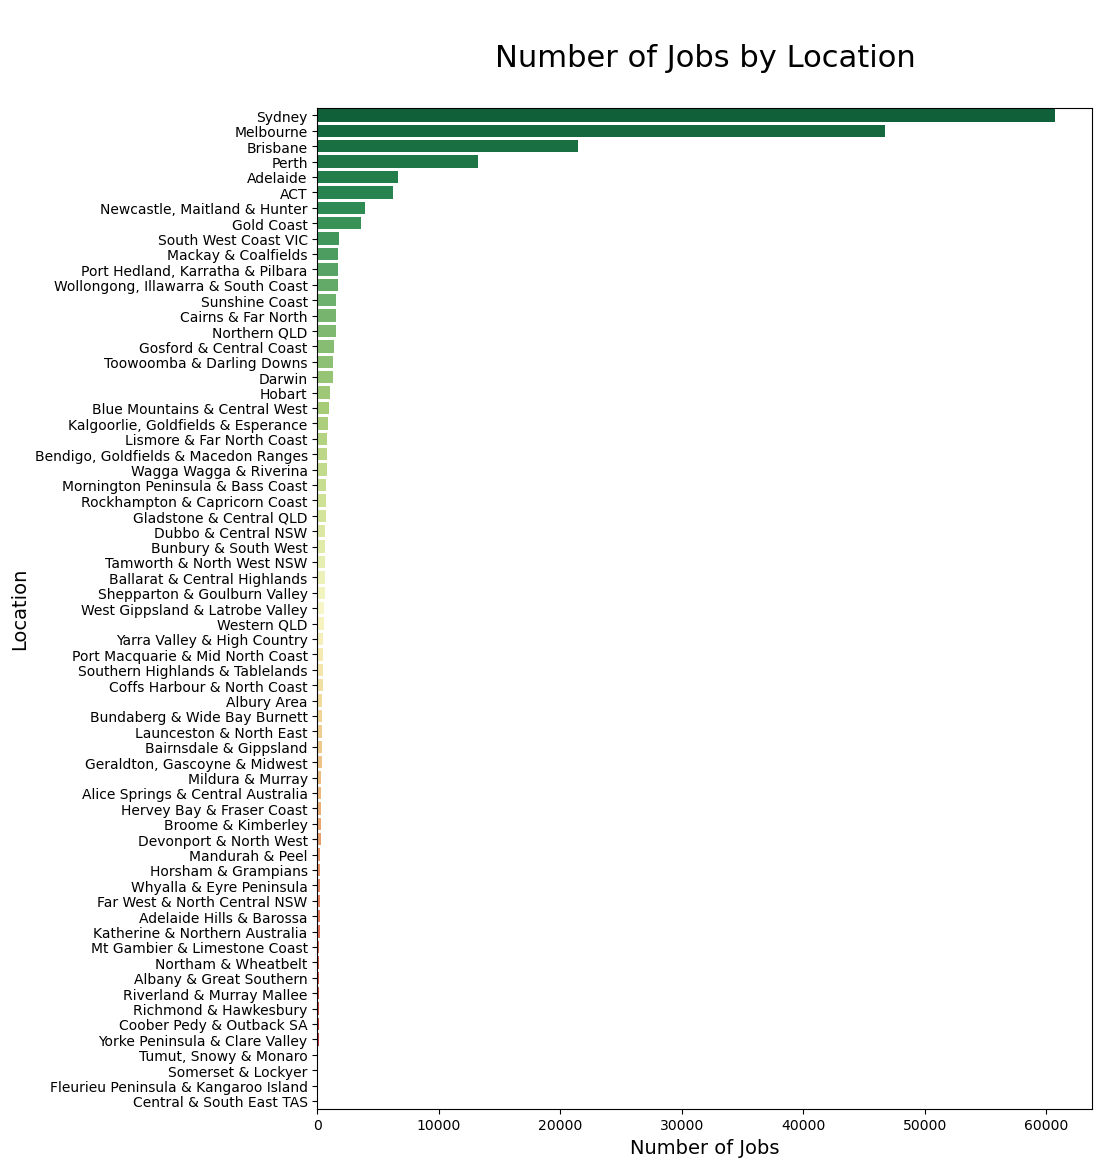

In [175]:
locations = assignment['Location'].dropna().unique()
df_location = pd.DataFrame({"Location": locations})
df_location['Count'] = df_location['Location'].apply(lambda x: pd.Series(len(assignment[assignment['Location']==x])))
df_location = df_location.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10,13))
loc_plot = sns.barplot(x=df_location['Count'], y=df_location['Location'], palette='RdYlGn_r')
plt.title('\nNumber of Jobs by Location\n',size=22)
plt.ylabel("Location", size=14)
plt.xlabel('Number of Jobs', size=14)

plt.show()

## Observation:
- Sydney, Melbourne, Brisbane, Perth and Adelaide have the highest number of jobs in total. Sydney is the most popular city for job opportunities with more than 60,000 job posts.  
- Places like Tumut, Snowy & Monaro, Somerset & Lockyer, Fleurieu Peninsula & Kangaroo Island, Central & South East TAs don't even have any jobs there. 

#### Comparion by number of jobs in Sydney and Brisbane

In [176]:
sydney_jobs_count = assignment[assignment['Location'] == 'Sydney'].shape[0]
brisbane_jobs_count = assignment[assignment['Location'] == 'Brisbane'].shape[0]
print("Number of jobs in Sydney:", sydney_jobs_count)
print("Number of jobs in Brisbane:", brisbane_jobs_count)

Number of jobs in Sydney: 60765
Number of jobs in Brisbane: 21466


## Observation:
Number of jobs in Sydney almost triple that in Brisbane. 

#### Comparison by job types in Sydney and Brisbane

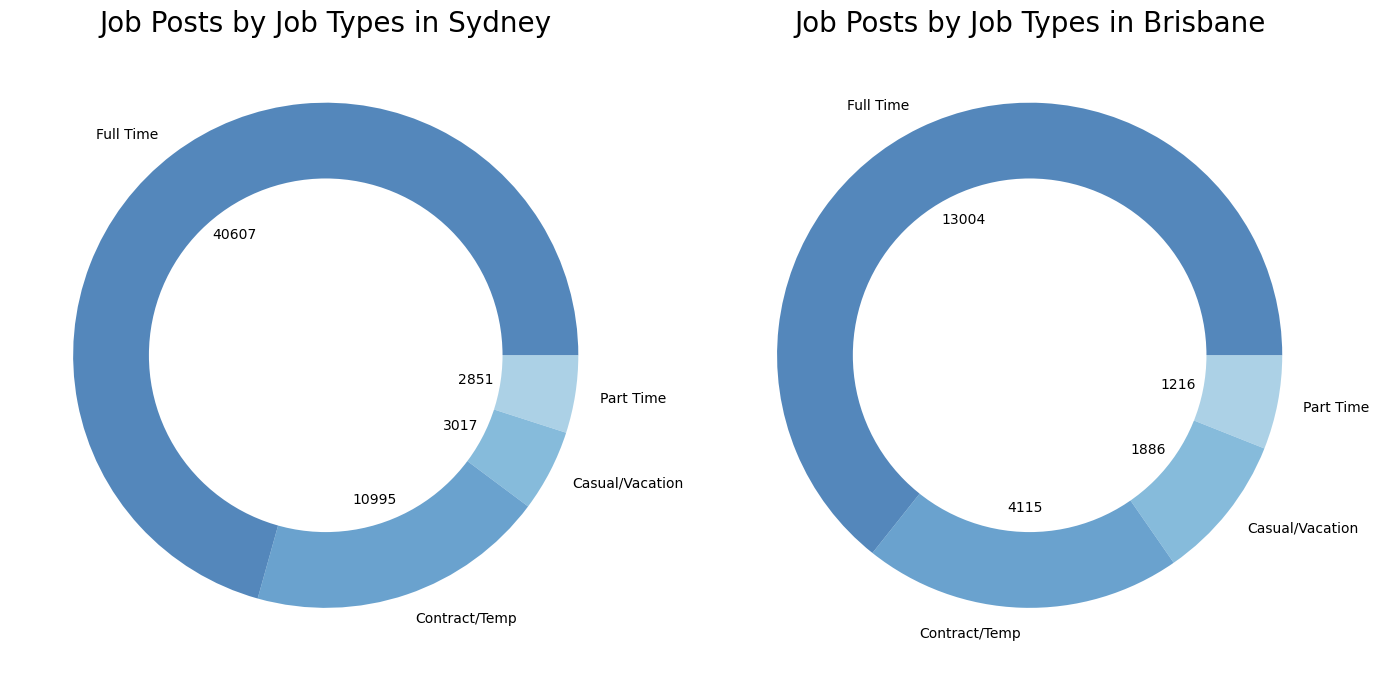

In [197]:
sydney_jobs = assignment[assignment['Location'] == 'Sydney']
brisbane_jobs = assignment[assignment['Location'] == 'Brisbane']

# Calculate the count of job types in Sydney and Brisbane
sydney_job_types_count = sydney_jobs['JobType'].value_counts().reset_index()
sydney_job_types_count.columns = ['JobType', 'Count']

brisbane_job_types_count = brisbane_jobs['JobType'].value_counts().reset_index()
brisbane_job_types_count.columns = ['JobType', 'Count']

# Define a custom autopct function to show actual counts
def absolute_value(val, total):
    return int(round(val/100.*total))

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the pie chart for Sydney
total_sydney = sydney_job_types_count['Count'].sum()  # Total counts for Sydney
p1, texts1, autotexts1 = ax1.pie(sydney_job_types_count['Count'], colors=sns.color_palette("Blues_r"), labels=sydney_job_types_count['JobType'], wedgeprops={'alpha':0.7}, autopct=lambda p: absolute_value(p, total_sydney))
ax1.set_title('Job Posts by Job Types in Sydney', size=20)

# Plot the pie chart for Brisbane
total_brisbane = brisbane_job_types_count['Count'].sum()  # Total counts for Brisbane
p2, texts2, autotexts2 = ax2.pie(brisbane_job_types_count['Count'], colors=sns.color_palette("Blues_r"), labels=brisbane_job_types_count['JobType'], wedgeprops={'alpha':0.7}, autopct=lambda p: absolute_value(p, total_brisbane))
ax2.set_title('Job Posts by Job Types in Brisbane', size=20)

# Add a center circle to create a donut shape
centre_circle1 = plt.Circle((0,0),0.70,color='black', fc='white', linewidth=0)
centre_circle2 = plt.Circle((0,0),0.70,color='black', fc='white', linewidth=0)
ax1.add_patch(centre_circle1)
ax2.add_patch(centre_circle2)

plt.tight_layout()
plt.show()

## Observation:
- "Full time" and "Contract/Temp" in Sydney almost triple those in Brisbane.
- "Part time" and "Casual/Vacation" in Sydnet nearly double those in Brisbane. 

#### Comparison by top 5 job sectors

In [178]:
sydney_top_sectors = sydney_jobs['Classification'].value_counts().head(5)
print("Top 5 job sectors in Sydney and their job counts:")
print(sydney_top_sectors)

brisbane_top_sectors = brisbane_jobs['Classification'].value_counts().head(5)
print("\nTop 5 job sectors in Brisbane and their job counts:")
print(brisbane_top_sectors)

Top 5 job sectors in Sydney and their job counts:
Classification
Information & Communication Technology    9548
Hospitality & Tourism                     4074
Trades & Services                         4026
Accounting                                4010
Healthcare & Medical                      3339
Name: count, dtype: int64

Top 5 job sectors in Brisbane and their job counts:
Classification
Information & Communication Technology    2768
Trades & Services                         1993
Healthcare & Medical                      1824
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1335
Name: count, dtype: int64


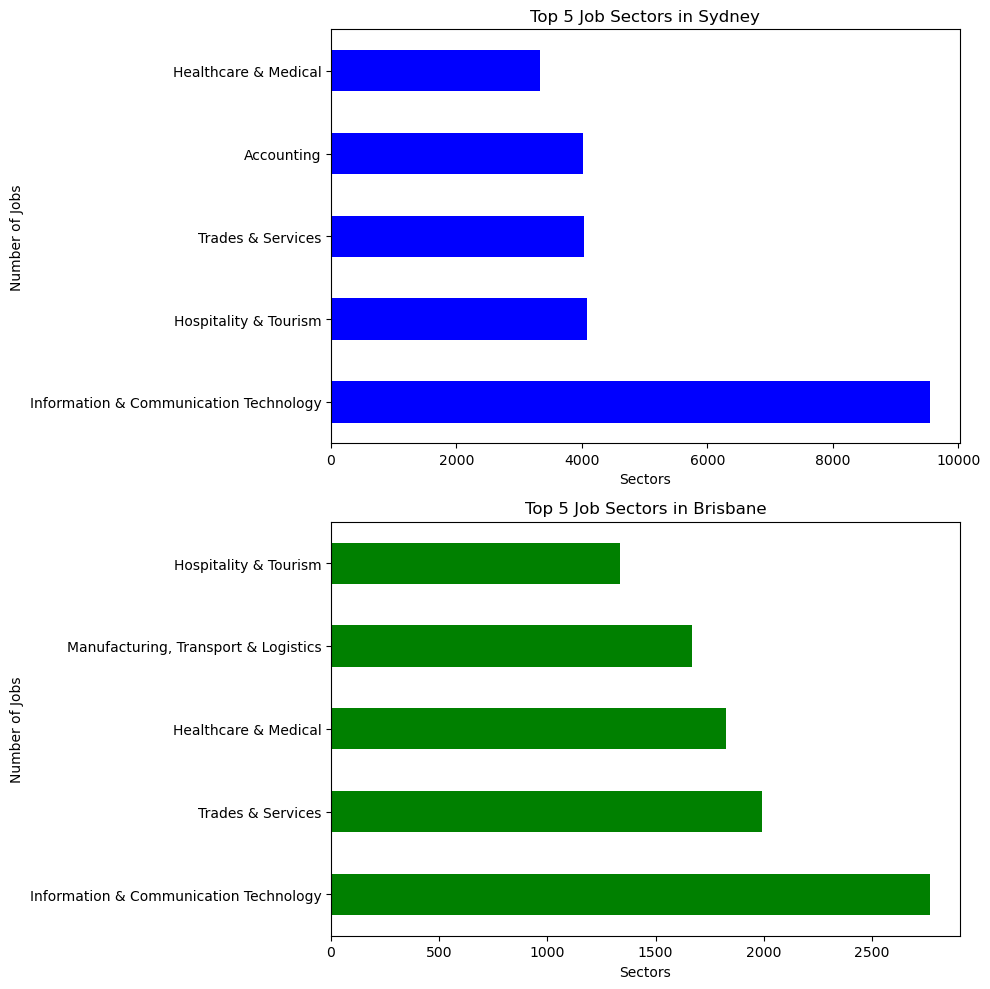

In [179]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sydney_top_sectors.plot(kind='barh', ax=ax[0], color='blue')
ax[0].set_title('Top 5 Job Sectors in Sydney')
ax[0].set_ylabel('Number of Jobs')
ax[0].set_xlabel('Sectors')

brisbane_top_sectors.plot(kind='barh', ax=ax[1], color='green')
ax[1].set_title('Top 5 Job Sectors in Brisbane')
ax[1].set_ylabel('Number of Jobs')
ax[1].set_xlabel('Sectors')

plt.tight_layout()
plt.show()

## Observation:
- Information & Communication Technology is the most popular classifications in both Sydney and Brisbane.
- The second and third order of the comparison, showing the differences in job demands between Sydney and Brisbane. While there are 4074 jobs in Hospitality and Tourism in Sydney, only 1335 of that in Brisbane. 
- Both cities have job demands in Healthcare & Medical, Trades & Services; but only Sydney has the demand for Accounting, while in Brisbane, Manufacturing, Transport & Logistics is pretty common. 

#### Job Salary Range and Corresponding Number of Jobs in Sydney and Brisbane

Job Salary Range and Corresponding Number of Jobs in Sydney and Brisbane:
Salary Range 0-30 - Sydney: 11753, Brisbane: 4082
Salary Range 30-40 - Sydney: 3969, Brisbane: 1565
Salary Range 40-50 - Sydney: 5371, Brisbane: 2734
Salary Range 50-60 - Sydney: 4861, Brisbane: 1936
Salary Range 60-70 - Sydney: 5288, Brisbane: 2033
Salary Range 70-80 - Sydney: 5033, Brisbane: 1800
Salary Range 80-100 - Sydney: 3738, Brisbane: 1327
Salary Range 100-120 - Sydney: 5579, Brisbane: 1934
Salary Range 120-150 - Sydney: 5706, Brisbane: 1462
Salary Range 150-200 - Sydney: 6274, Brisbane: 1612
Salary Range 200+ - Sydney: 3193, Brisbane: 981
'Sydney more well-paid!'


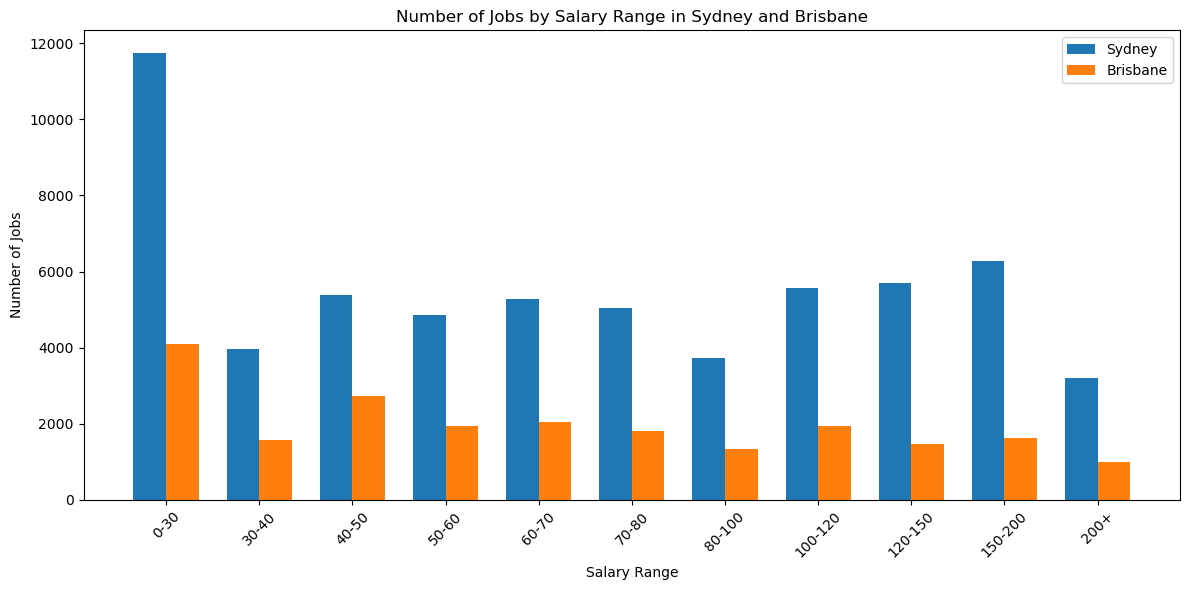

In [180]:
# Prepare the DataFrame for salary ranges (assuming the 'Low' and 'High' are correctly assigned and unique)
low = assignment['LowestSalary'].dropna().unique()
high = assignment['HighestSalary'].dropna().unique()
assert(len(low) == len(high))  # This ensures each low value has a corresponding high value

df_salary_ranges = pd.DataFrame({"Low": low, "High": high})
df_salary_ranges['Label'] = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', '120-150', '150-200', '200+']

# Filter jobs by Sydney and Brisbane
sydney_jobs = assignment[assignment['Location'] == 'Sydney']
brisbane_jobs = assignment[assignment['Location'] == 'Brisbane']

# Calculate job counts for each salary range in Sydney and Brisbane
def count_jobs_in_range(city_jobs, salary_ranges):
    counts = []
    for index, row in salary_ranges.iterrows():
        count = city_jobs[(city_jobs['LowestSalary'] >= row['Low']) & (city_jobs['HighestSalary'] <= row['High'])].shape[0]
        counts.append(count)
    return counts

sydney_counts = count_jobs_in_range(sydney_jobs, df_salary_ranges)
brisbane_counts = count_jobs_in_range(brisbane_jobs, df_salary_ranges)

df_salary_ranges['SydneyCount'] = sydney_counts
df_salary_ranges['BrisbaneCount'] = brisbane_counts

# Print the job salary range with the corresponding number of jobs for Sydney and Brisbane
print("Job Salary Range and Corresponding Number of Jobs in Sydney and Brisbane:")
for index, row in df_salary_ranges.iterrows():
    print(f"Salary Range {row['Label']} - Sydney: {row['SydneyCount']}, Brisbane: {row['BrisbaneCount']}")
print("'Sydney more well-paid!'")


# Plotting the comparison as bar charts
fig, ax = plt.subplots(figsize=(12, 6))
index = range(len(df_salary_ranges['Label']))
bar_width = 0.35

rects1 = ax.bar(index, df_salary_ranges['SydneyCount'], bar_width, label='Sydney')
rects2 = ax.bar([p + bar_width for p in index], df_salary_ranges['BrisbaneCount'], bar_width, label='Brisbane')

ax.set_xlabel('Salary Range')
ax.set_ylabel('Number of Jobs')
ax.set_title('Number of Jobs by Salary Range in Sydney and Brisbane')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(df_salary_ranges['Label'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observation:
- Sydney has more well-paid jobs than in Brisbane. 
- The highest salary range of Sydney and Brisbane is 0 - 30.
- Sydney has more jobs from 100 - 200+, while Brisbane has more jobs from 50 - 80. 

Overall, Sydney seems to be a better choice for employees, with more well-paid jobs and more job opportunities. 

# 2. Analyse by time 

#### Visualise the number of job posts by month

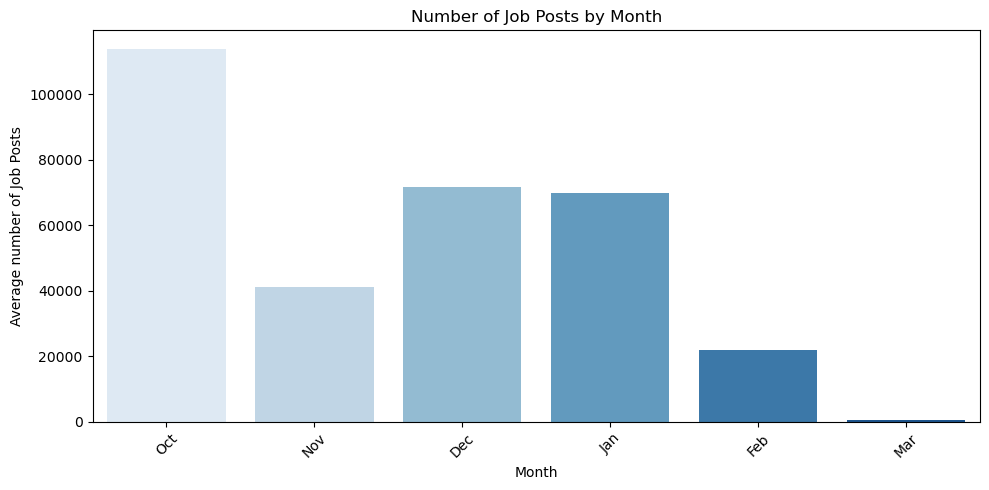

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and year from Date
assignment['Year'] = assignment['Date'].dt.year
assignment['Month'] = assignment['Date'].dt.month

# Adjust year for months to maintain chronological sequence Oct, Nov, Dec, Jan, Feb, Mar
assignment['AdjustYear'] = assignment['Year'] + (assignment['Month'] < 10).astype(int)  # Increment year if month is before October

# Combine adjusted year and month into a sortable format
assignment['YearMonth'] = assignment['AdjustYear'].astype(str) + '-' + assignment['Month'].astype(str).str.zfill(2)

# Count the number of job posts by this new combined YearMonth
monthly_counts = assignment.groupby('YearMonth').size()

# Ensure the months are sorted chronologically
monthly_counts = monthly_counts.sort_index()

# Optional: Filter for specific period if needed
# monthly_counts = monthly_counts['2019-10':'2020-03']

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Blues")
plt.title('Number of Job Posts by Month')
plt.xlabel('Month')
plt.ylabel('Average number of Job Posts')

# Optional: Customize x-tick labels to show just the month names or as desired
month_labels = [pd.to_datetime(date).strftime('%b') for date in monthly_counts.index]
plt.xticks(ticks=range(len(month_labels)), labels=month_labels, rotation=45)

plt.tight_layout()
plt.show()

## Observation:
The bar chart shows the number of job posts by month from October to March. October has the highest job postings, averaging over 100,000, likely due to end-of-year hiring. November sees a significant drop to around 50,000 posts. December postings rise slightly to about 70,000. January maintains similar levels to December, indicating a start-of-year hiring surge. February experiences a sharp decline to around 20,000 posts. March has the lowest postings, with minimal activity. This pattern suggests peak hiring in October and January, with notable declines in November, February, and March.

#### Visualise the number of job posts by day of week.

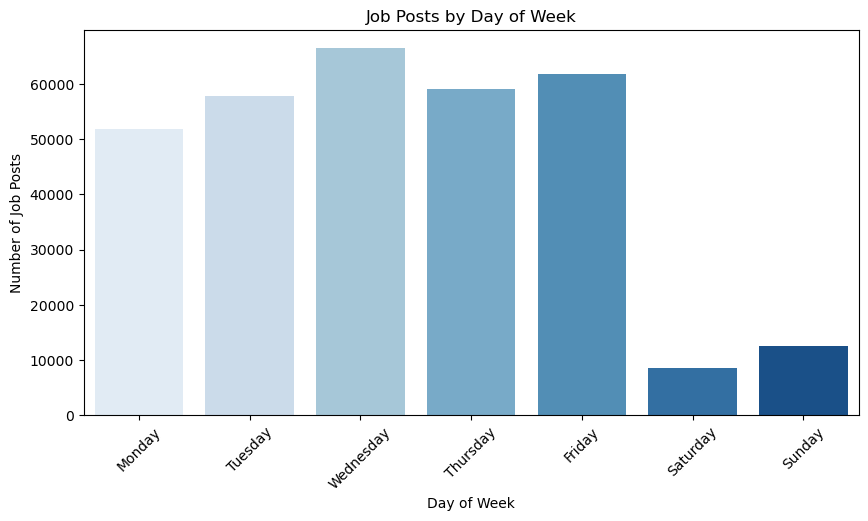

In [182]:
assignment['DayOfWeek'] = assignment['Date'].dt.day_name()

# Step 2: Count the number of job posts for each day of the week
day_of_week_counts = assignment['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Step 3: Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Blues')
plt.title('Job Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.show()

## Observation: 

The bar chart illustrates the number of job posts by day of the week. Job postings are highest on Wednesday and Friday, both exceeding 60,000 posts. Tuesday and Thursday also see substantial activity, with around 50,000 to 60,000 posts. Monday has slightly fewer postings, at about 50,000. In contrast, weekends show a significant drop in job postings, with Saturday and Sunday having the lowest numbers, below 20,000. This pattern indicates that job postings are most frequent on weekdays, particularly mid-week, and significantly less common on weekends.

#### Visualise the number of job posts by day of the month.

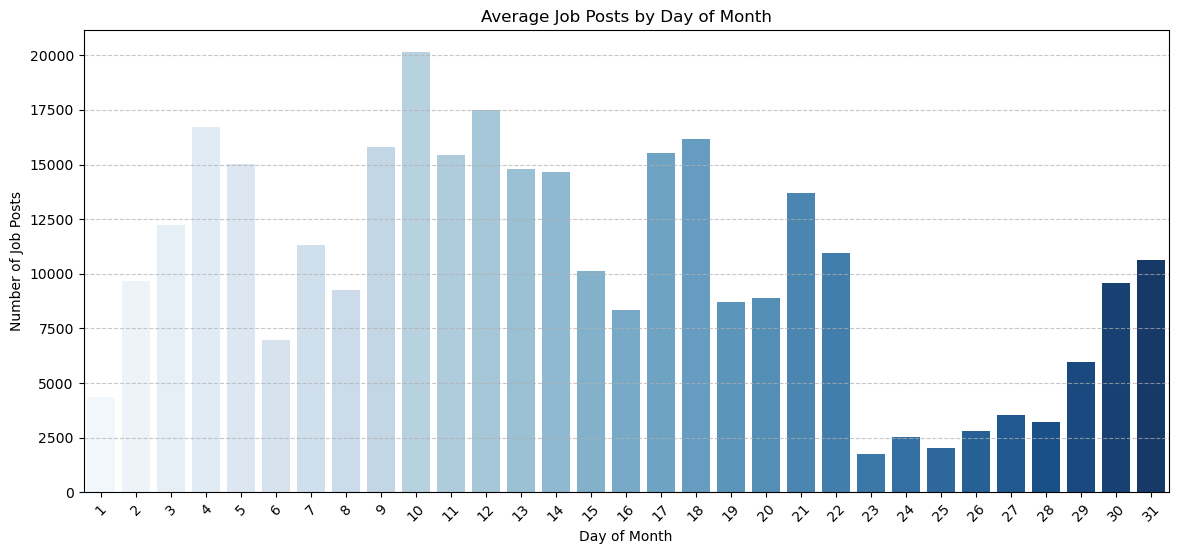

In [183]:
assignment['DayOfMonth'] = assignment['Date'].dt.day

# Step 2: Count the number of job posts for each day of the month
day_of_month_counts = assignment['DayOfMonth'].value_counts().sort_index()

# Step 3: Plot the data
plt.figure(figsize=(14, 6))  # Wider plot for better visibility of all days
sns.barplot(x=day_of_month_counts.index, y=day_of_month_counts.values, palette="Blues")
plt.title('Average Job Posts by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts')
plt.xticks(rotation=45)  # Rotate the x-ticks for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Adding a grid for better readability of counts
plt.show()

## Observation:

The bar chart illustrates the average number of job posts by day of the month. Job postings peak on the 10th day, with over 20,000 posts, indicating a significant surge in job listings around this time. Other notable high posting days include the 3rd, 4th, 12th, 18th, and the last few days of the month, particularly the 30th and 31st, each with approximately 15,000 to 20,000 posts.

The early part of the month (1st to 5th) shows a steady increase in postings, while mid-month (10th to 16th) experiences a slight decline. The latter part of the month, especially from the 27th onward, shows another rise in job posti.

Overall, the pattern suggests that job postings tend to peak around specific days of the month, particularly the 10th, and the after mid-month period tends to be quieter in terms of job postings.

#### Visualise trending of the job postings for the big cities.

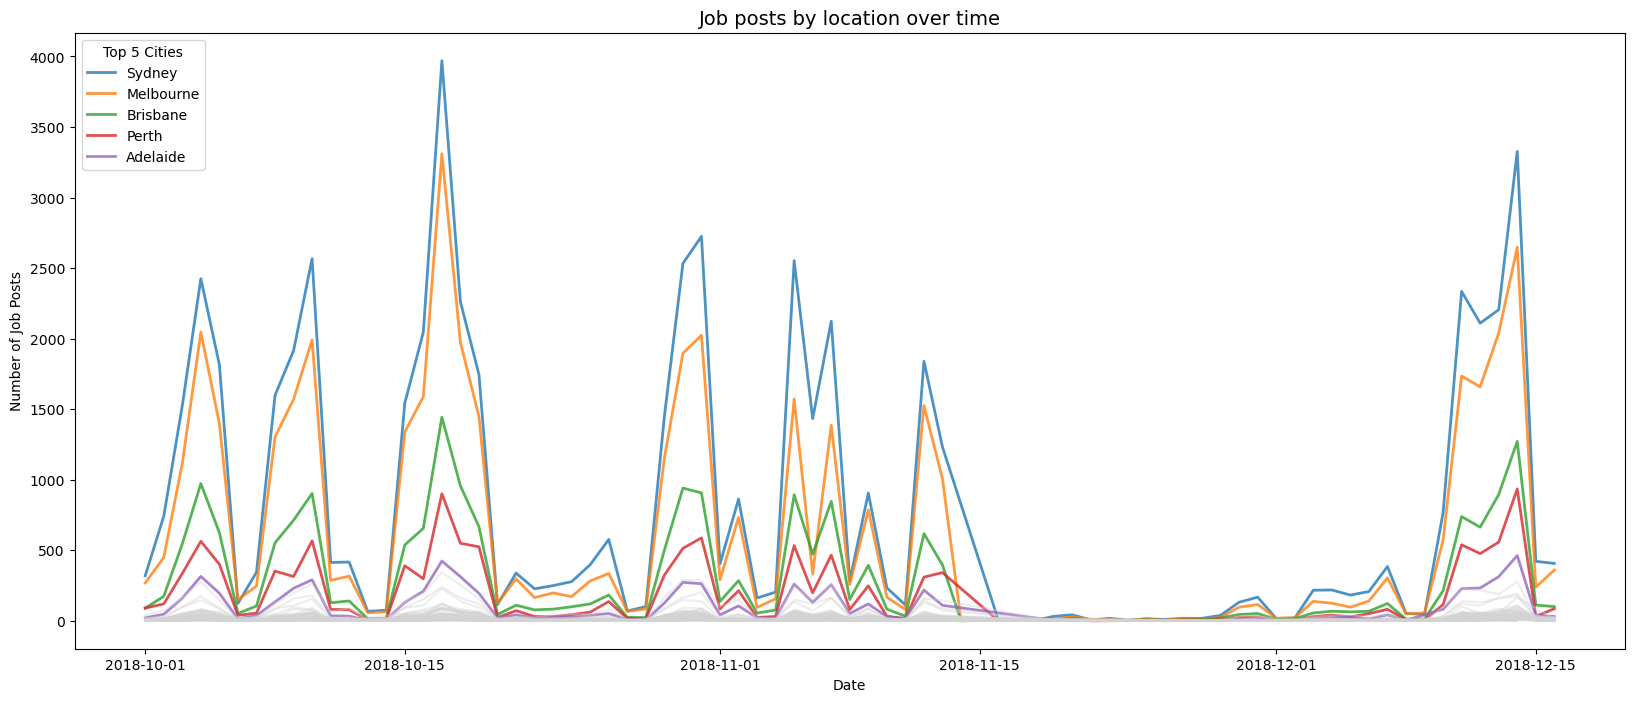

In [184]:
df_location = assignment[assignment['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = assignment[assignment['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job posts by location over time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

## Observation:
The graph displays job postings for the top five cities with Sydney, Melbourne, Brisbane, Perth, and Adelaide in descending order of volume. Sydney consistently has the highest number of job posts. All cities show similar fluctuation patterns in their curves, differing only in magnitude but maintaining the same rank order. However, there does not seem to be a distinct pattern in the overall fluctuations. The highest peak of the curve falls on October 16, 2018, and the second highest peak is on December 15, 2018.

The record starts from October 1, 2018, to December 15, 2018. Notably, there is a significant drop or possibly missing data from November 16, 2018, to November 30, 2018.

# 3. Forecasting and skill extraction 

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart.

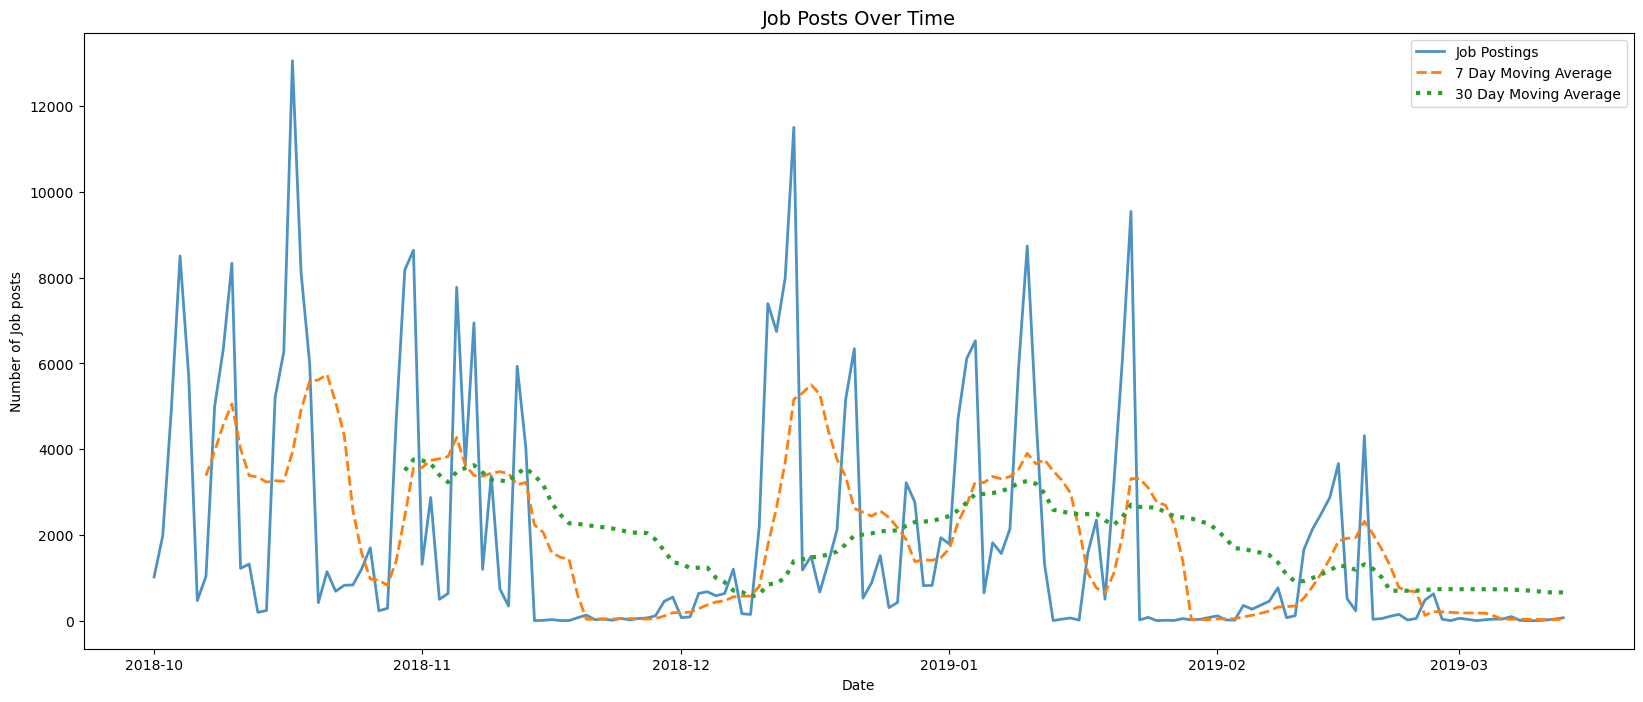

In [186]:
# Get the count of jobs over time
df_timeseries_total = assignment.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7)
moving_average_month = df_timeseries_total.rolling(30)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

## Observation:

This time series plot illustrates the number of job postings over time, with additional insights provided by overlaying 7-day and 30-day moving averages. The dashed orange line represents the 7-day moving average, closely tracking the trend of job postings and providing a more immediate understanding of fluctuations. Conversely, the green dotted line represents the 30-day moving average, which may not align as closely with the immediate trend but offers valuable insights for long-term predictions. Despite its divergence in the short term, the 30-day moving average can be more reliable for long-term forecasting, yielding more accurate predictions

In [187]:
# Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. 
# Visualise them in word cloud chart 
# (hint: you can use the online tool https://wordart.com/create or similar websites)**.

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

assignment['Classification'].fillna('', inplace=True)

assignment['tokens'] = assignment.apply(lambda row: nltk.word_tokenize(row['Classification']), axis = 1)
assignment['alpha'] = assignment['tokens'].apply(lambda x: [item for item in x if item.isalpha()])
# Remove stop words
stop_words = stopwords.words('english')
assignment['stop'] = assignment['alpha'].apply(lambda x: [item for item in x if item not in stop_words])
# Stem
stemmer = PorterStemmer()
assignment['stemmed'] = assignment['stop'].apply(lambda x: [stemmer.stem(item) for item in x])
assignment['stemmed'] 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dinhthingocha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dinhthingocha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/ll/s3gcwbbn2210b53hfksb0dk80000gn/T/ipykernel_1865/2223334673.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assignment['Classification'].fillna('', inplace=True)


0             [retail, consum, product]
1             [retail, consum, product]
2             [retail, consum, product]
3             [retail, consum, product]
4         [call, centr, custom, servic]
                      ...              
318472                               []
318473                               []
318474                               []
318475                               []
318476                               []
Name: stemmed, Length: 318477, dtype: object

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
assignment['stemmed_str'] = assignment['stemmed'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer(analyzer ='word')
BOW = vectorizer.fit_transform(assignment['stemmed_str']).toarray()
BOW.shape

(318477, 62)

#### TF/IDF

In [189]:
!pip install wordcloud

In [190]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wordcloud

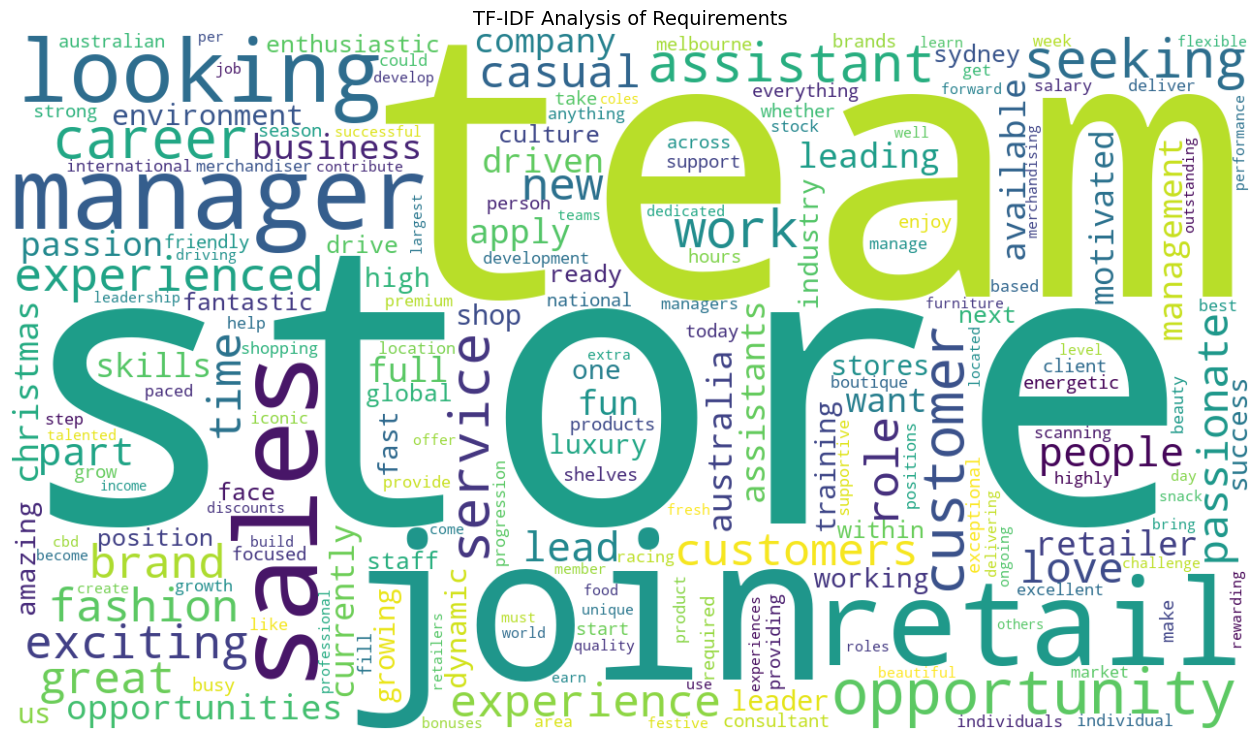

In [191]:
def update(Classification="Retail & Consumer Products "):
    requirements = assignment[assignment['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
update(Classification="Retail & Consumer Products")

## Observation:

- "Team" and "Store" are highly valued in all job sectors
-  Most of the words are closely related to the characteristics of Retail and Consumer Products such as retail, join, customer, service, experience, sales, etc.
- There are a lot of adjectives in these job posts about the Retail and Consumer industry such as energetic, passionate, motivated, etc.

# 4. Part 4: Discussion

## Scenario 1:

Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words)

#### In this part, our approaches are to:
- Filter the locations within QLD
- Sort out the job posts with average salary >= 80k
- Sort out the relevant major that associated with the average salary >= 80k
- Suggest the related subjects, skillsets and systems/tools for his study at high school and university

In [192]:
queensland_locations = [
    'Brisbane', 'Sunshine Coast', 'Gold Coast', 'Mackay & Coalfields',
    'Hervey Bay & Fraser Coast', 'Far West & North Central NSW',
    'Cairns & Far North', 'Toowoomba & Darling Downs', 'Rockhampton & Capricorn Coast',
    'Northern QLD', 'Gladstone & Central QLD', 'Western QLD', 'Bundaberg & Wide Bay Burnett'
]

# filter location only in QLD
df_queensland = assignment[assignment['Location'].isin(queensland_locations)]
df_queensland.head(15)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,...,Month,AdjustYear,YearMonth,DayOfWeek,DayOfMonth,tokens,alpha,stop,stemmed,stemmed_str
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,...,10,2018,2018-10,Sunday,7,"[Retail, &, Consumer, Products]","[Retail, Consumer, Products]","[Retail, Consumer, Products]","[retail, consum, product]",retail consum product
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,...,10,2018,2018-10,Sunday,7,"[Hospitality, &, Tourism]","[Hospitality, Tourism]","[Hospitality, Tourism]","[hospit, tourism]",hospit tourism
13,37404335.0,BPV_Utility All Rounders_Casual,ISS Facility Services,2018-10-07,Mackay & Coalfields,NaN,Hospitality & Tourism,Housekeeping,An exciting opportunity exists for Casual DIDO...,NaN,...,10,2018,2018-10,Sunday,7,"[Hospitality, &, Tourism]","[Hospitality, Tourism]","[Hospitality, Tourism]","[hospit, tourism]",hospit tourism
15,37404259.0,Customer Service Officer,NaN,2018-10-07,Sunshine Coast,NaN,Call Centre & Customer Service,Customer Service - Call Centre,An opportunity for a customer service-focused ...,NaN,...,10,2018,2018-10,Sunday,7,"[Call, Centre, &, Customer, Service]","[Call, Centre, Customer, Service]","[Call, Centre, Customer, Service]","[call, centr, custom, servic]",call centr custom servic
21,37404239.0,Casual Barista in Murarrie,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,...,10,2018,2018-10,Sunday,7,"[Hospitality, &, Tourism]","[Hospitality, Tourism]","[Hospitality, Tourism]","[hospit, tourism]",hospit tourism
25,37404209.0,Casual Cook in Palm Beach,Jora Local,2018-10-07,Gold Coast,NaN,Hospitality & Tourism,Chefs/Cooks,A cafe/restaurant in Palm Beach is seeking a c...,NaN,...,10,2018,2018-10,Sunday,7,"[Hospitality, &, Tourism]","[Hospitality, Tourism]","[Hospitality, Tourism]","[hospit, tourism]",hospit tourism
26,37404396.0,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,...,10,2018,2018-10,Sunday,7,"[Administration, &, Office, Support]","[Administration, Office, Support]","[Administration, Office, Support]","[administr, offic, support]",administr offic support
40,37404400.0,Project Officer,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,...,10,2018,2018-10,Sunday,7,"[Administration, &, Office, Support]","[Administration, Office, Support]","[Administration, Office, Support]","[administr, offic, support]",administr offic support
44,37404192.0,"Retail Sales, Online Selling, Receptionist and...",Wholesale Furniture Outlet,2018-10-07,Brisbane,CBD & Inner Suburbs,Sales,Sales Representatives/Consultants,Are you passionate about sales? Do you have a ...,NaN,...,10,2018,2018-10,Sunday,7,[Sales],[Sales],[Sales],[sale],sale
55,37404398.0,Project Officer - BRiTA Futures,Metro South Health,2018-10-07,Brisbane,NaN,Administration & Office Support,Other,Queensland Transcultural Mental Health Centre ...,NaN,...,10,2018,2018-10,Sunday,7,"[Administration, &, Office, Support]","[Administration, Office, Support]","[Administration, Office, Support]","[administr, offic, support]",administr offic support


In [193]:
high_income_jobs = df_queensland[df_queensland['AverageSalary'] >= 80]
high_income_jobs

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,...,Month,AdjustYear,YearMonth,DayOfWeek,DayOfMonth,tokens,alpha,stop,stemmed,stemmed_str
14314,37399942.0,Industry Trainers needed – Central Queensland,Corporate Protection Australia,2018-10-05,Gladstone & Central QLD,NaN,Education & Training,Teaching - Vocational,"Baseline Training Pty Ltd, part of the CPA Gro...","<p>Corporate Protection Australia Group, incor...",...,10,2018,2018-10,Friday,5,"[Education, &, Training]","[Education, Training]","[Education, Training]","[educ, train]",educ train
14317,37399918.0,Technical Support Manager - Horticulture and B...,Evolve Scientific Recruitment,2018-10-05,Far West & North Central NSW,NaN,"Farming, Animals & Conservation",Agronomy & Farm Services,Technical Support Manager | Regional NSW | Fer...,<strong>About the company:</strong><br>The com...,...,10,2018,2018-10,Friday,5,"[Farming, ,, Animals, &, Conservation]","[Farming, Animals, Conservation]","[Farming, Animals, Conservation]","[farm, anim, conserv]",farm anim conserv
14338,37399769.0,Electrician,JTMEC Pty Ltd,2018-10-05,Western QLD,NaN,"Mining, Resources & Energy",Mining - Engineering & Maintenance,JTMEC are seeking expressions of interest from...,<p><strong>YOU CAN RELY ON US</strong></p>\n ...,...,10,2018,2018-10,Friday,5,"[Mining, ,, Resources, &, Energy]","[Mining, Resources, Energy]","[Mining, Resources, Energy]","[mine, resourc, energi]",mine resourc energi
14349,37399675.0,PHARMACIST - 2 IC,Star Pharmacy Group,2018-10-05,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Exclusive opportunity to have permanent roster...,"<h2 class=""subheading"">Smithfield - Star Disco...",...,10,2018,2018-10,Friday,5,"[Healthcare, &, Medical]","[Healthcare, Medical]","[Healthcare, Medical]","[healthcar, medic]",healthcar medic
14354,37399661.0,Clinical Care Coordinator - Toowoomba,Redstone Recruitment Pty Ltd,2018-10-05,Toowoomba & Darling Downs,NaN,Healthcare & Medical,Nursing - Aged Care,Experienced Registered Nurse/Clinical Nurse re...,"<p style=""text-align:center;""><strong>Clinical...",...,10,2018,2018-10,Friday,5,"[Healthcare, &, Medical]","[Healthcare, Medical]","[Healthcare, Medical]","[healthcar, medic]",healthcar medic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197192,NaN,Mining Superintendent,Pivot Management Group,2018-11-29,Mackay & Coalfields,NaN,"Mining, Resources & Energy",Mining - Operations,Experienced mining production leaders role/ Op...,<p> </p>\n <p><strong>About the busin...,...,11,2018,2018-11,Thursday,29,"[Mining, ,, Resources, &, Energy]","[Mining, Resources, Energy]","[Mining, Resources, Energy]","[mine, resourc, energi]",mine resourc energi
197196,NaN,Chief Financial Officer & Company Secretary,Randstad - Accounting,2018-11-29,Brisbane,Southern Suburbs & Logan,Accounting,Company Secretaries,CFO & Company Secretary,"<p style=""text-align:center;""><strong>High pro...",...,11,2018,2018-11,Thursday,29,[Accounting],[Accounting],[Accounting],[account],account
197202,NaN,High Rise Project Manager,Hays Construction,2018-11-29,Gold Coast,NaN,Construction,Project Management,High rise Project Manager required for central...,<p>High rise Project Manager required for cent...,...,11,2018,2018-11,Thursday,29,[Construction],[Construction],[Construction],[construct],construct
197219,NaN,Medical Officer,Coal Services Pty Ltd,2018-11-29,Brisbane,NaN,Healthcare & Medical,General Practitioners,Coal Services Health are looking for a Medical...,<p>&nbsp;</p>\n <ul>\n <li><st...,...,11,2018,2018-11,Thursday,29,"[Healthcare, &, Medical]","[Healthcare, Medical]","[Healthcare, Medical]","[healthcar, medic]",healthcar medic


In [194]:
classification_counts = high_income_jobs['Classification'].value_counts().sort_values(ascending=False)
classification_counts 

Classification
Information & Communication Technology    2109
Healthcare & Medical                      1667
Mining, Resources & Energy                1194
Engineering                                811
Government & Defence                       760
Construction                               689
Education & Training                       475
Trades & Services                          418
Accounting                                 385
Sales                                      373
Legal                                      373
Manufacturing, Transport & Logistics       270
Human Resources & Recruitment              214
Banking & Financial Services               172
Marketing & Communications                 130
CEO & General Management                   105
Real Estate & Property                      94
Consulting & Strategy                       92
Administration & Office Support             86
Community Services & Development            74
Insurance & Superannuation                  7

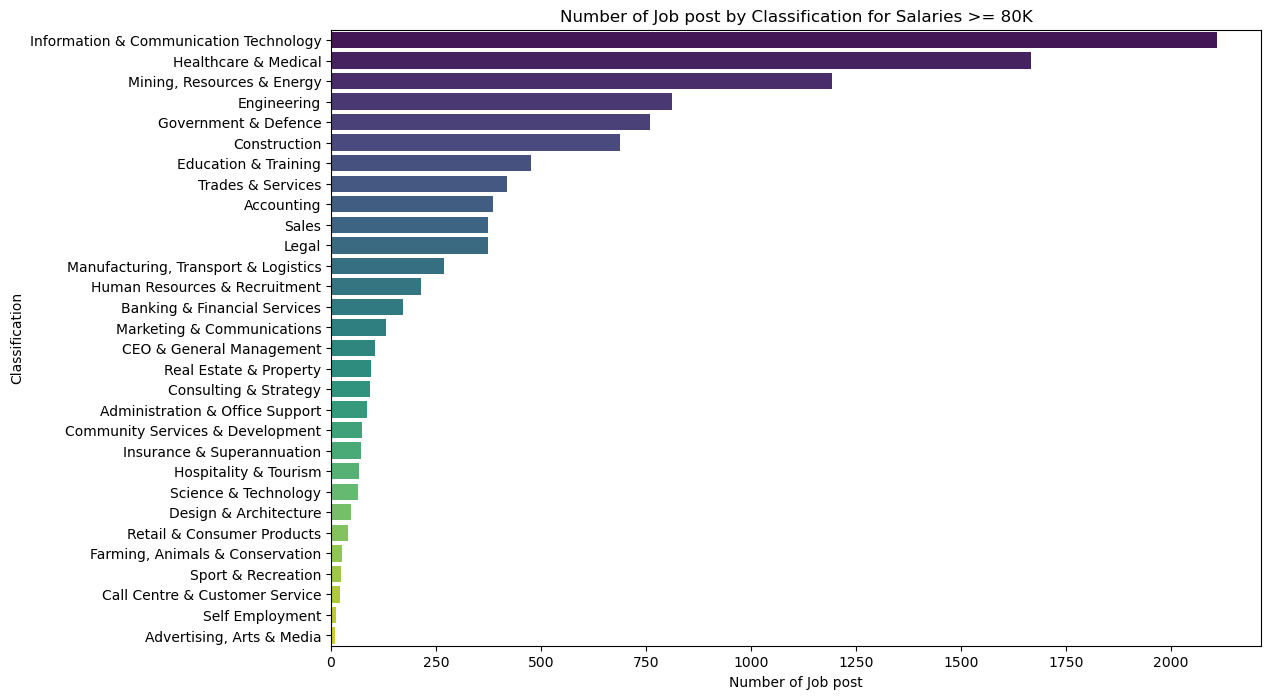

In [195]:
plt.figure(figsize=(12, 8))
sns.barplot(x=classification_counts.values, y=classification_counts.index, palette="viridis")
plt.title('Number of Job post by Classification for Salaries >= 80K')
plt.xlabel('Number of Job post')
plt.ylabel('Classification')
plt.show()

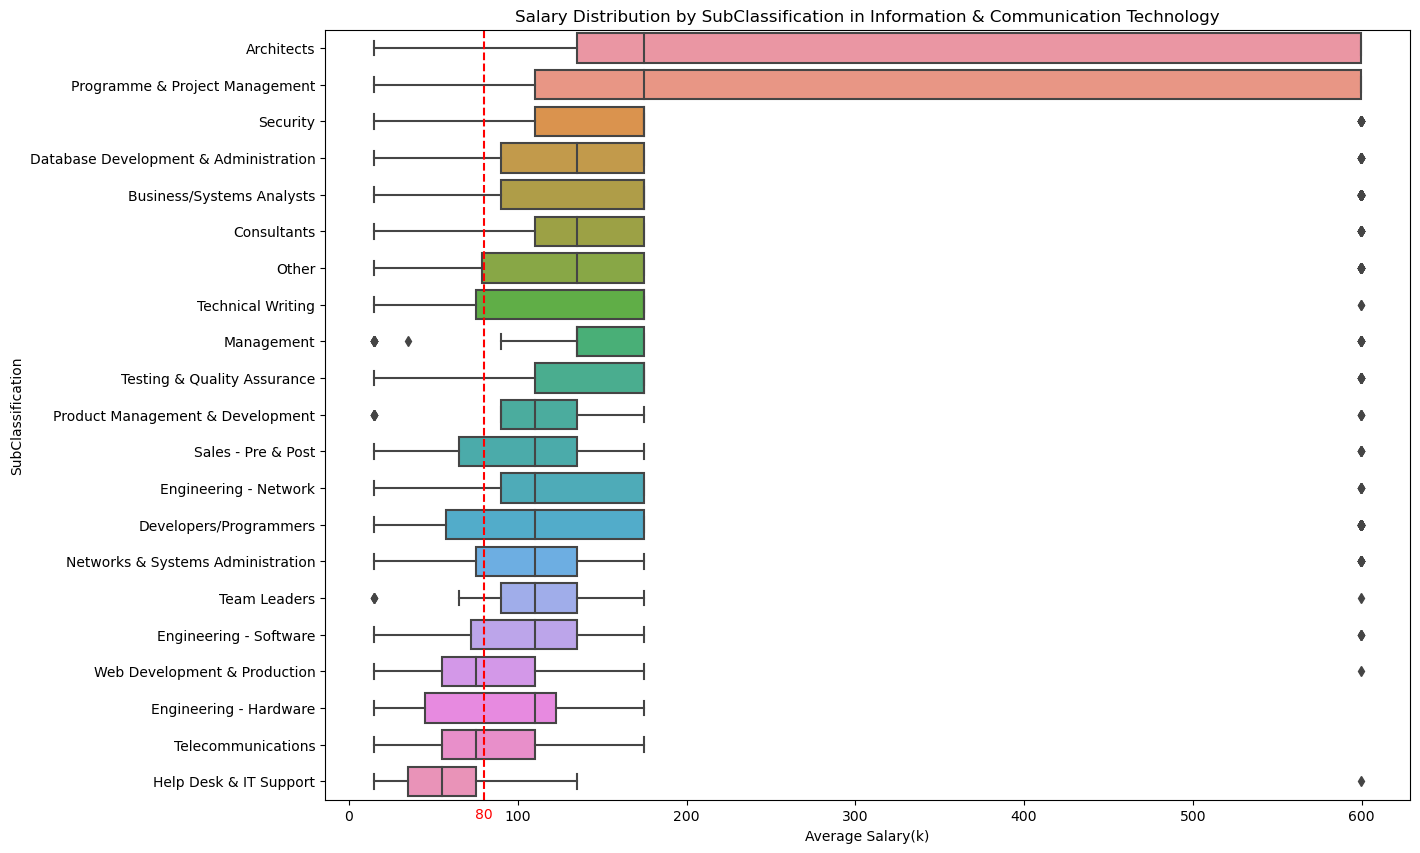

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the jobs in Information & Communication Technology
ict_jobs = df_queensland[df_queensland['Classification'] == 'Information & Communication Technology']

# Calculate the mean salary for each sub-classification and sort them
mean_salary = ict_jobs.groupby('SubClassification')['AverageSalary'].mean().sort_values(ascending=False)

# Plot a box plot to compare salary distributions across different sub-classifications, with x and y axes swapped
plt.figure(figsize=(14, 10))
ax = sns.boxplot(y='SubClassification', x='AverageSalary', data=ict_jobs, order=mean_salary.index)

# Add a vertical line at 80K
plt.axvline(x=80, color='red', linestyle='--')
# Add a text label for the 80K line at the bottom
plt.text(80, 21.005, '80', color='red', ha='center')
plt.title('Salary Distribution by SubClassification in Information & Communication Technology')
plt.ylabel('SubClassification')
plt.xlabel('Average Salary(k)')
plt.show()

## Summary:

From the chart "Number of job posts by classification for salaries", we see that the Information and Communication Technology has the highest job posts that have the salaries which are equal to or beyond 80k/year. Then, by the box plot showing the "Salary Distribution by Subclassification in Information & Communication Technology", we see that the subclassifications "Programme & Project Management" and "Architects" have the highest distribution of salary ranges >= 80k/year. On the contrary, Telecommunications, Help Desk & IT Support have the lowest paid salary in the list, which are below 80k/year. 

Based on our statistics and our research, we suggest him, while in his high school, focus on the relevant subjects such as maths, coding & programming languages, and project management courses. When he chooses the university, he should concentrate on the universities with good reputation for IT, and may need to consider these course while studying:
- Architecture concepts & designs
- System analysis and development
- Computer networks
- IT project management
- Agile business analysis

Apart from his study, we suggest developing necessary skillsets:
- Soft skills:
     - Strong communication
     - Effective negotiation 
     - Problem-solving
     - Leadership
     - Teamwork
     - Stakeholder management
- Technical skills:
     - Enterprise architecture frameworks: TOGAF, Zachman Framework, etc
     - Agile methodologies: scrum, Kanban, etc
     - Programming languages: Python, Java, etc
- Tools and systems: 
     - Visualisation: Lucid chart, visio, Figma, etc
     - Cloud platforms: AWS, GCP Azure
     - Enterprise Architecture: Sparx Systems Enterprise Architect, IBM Rational System Architect, ARIS
     - DevsOps: Jenkins, Git
     - Database management systems: Oracle, MySQL, Microsoft SQL server
     - Project management: Trello
     - Agile and scrum: Jira

## Scenario 2:

To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** 

Based on our findings from the chart "Number of Job post by Classification for Salaries >= 80K", we see that the three classifications that have the jobs with salary over or equal to 80k are ICT, Healthcare & Medical, and Mining, Resources & Energy. Therefore, Griffith University should expand majors in:
- ICT: IT Architects and IT Project Management
- Healthcare & Medical
- Science: Mining, Energy and Resources

# Part 5: References
1. OpenAI. (2023). ChatGPT (Mar 14 version) [Large language model]. https://chat.openai.com/chat
2. Leanix. (2024). SKILL SETS, CAREER PATHS, AND MUST-HAVES OF IT Architects. https://www.leanix.net/en/wiki/it-architecture/it-architects
3. The Open Group (2011). TOGAF® Version 9 - Download. Architecture Forum. Retrieved on 17 November 2011 from http://www.opengroup.org/architecture/togaf9/downloads.htm
4. Griffith University. (2024). Data [CSV file]. https://drive.google.com/file/d/1rkJpU1syooFImwFBKh5TVthVqPYBI8ps/view